# Ireland Marriage Equality Referendum (2015)

- The referendum results were obtained from the government's open data portal (https://data.gov.ie/ga/dataset/referendum-on-the-thirty-fourth-amendment-of-the-constitution-bill-2015)
- The constituency boundaries shapefile was obtained from the Central Statistics Office website (https://www.cso.ie/en/census/census2011boundaryfiles/)

## Importing the Data and Preliminary Exploration

The relevant packages were imported, and the dataset and shapefile were loaded. 

In [169]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

In [171]:
# Load referendum results
results = pd.read_csv("2015thirty-fourthamendment.csv", skiprows=1)

# Load shapefile
ireland_map = gpd.read_file("Constituencies_2007.shp")

The format of the dataset was investigated using the `head()` and `info()` functions, revealing 44 entries with 7 columns.

In [172]:
results.head()

,Constituency,Electorate,Total Poll,Percentage Poll,Votes in favour of proposal,Votes against proposal,Spoilt votes
0,Carlow-Kilkenny,"104,735","68,531",65.43,"38,166","29,697",668
1,Cavan-Monaghan,"99,265","56,774",57.19,"28,494","27,763",517
2,Clare,"81,809","48,627",59.44,"28,137","20,154",336
3,Cork East,"81,271","49,532",60.95,"30,383","18,845",304
4,Cork North-Central,"75,263","45,059",59.87,"28,479","16,182",398


In [175]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Constituency                 44 non-null     object 
 1   Electorate                   44 non-null     object 
 2   Total Poll                   44 non-null     object 
 3   Percentage Poll              44 non-null     float64
 4   Votes in favour of proposal  44 non-null     object 
 5   Votes against proposal       44 non-null     object 
 6   Spoilt votes                 44 non-null     object 
dtypes: float64(1), object(6)
memory usage: 2.5+ KB


The values in columns 1, 2, 4, 5 & 6 have type `object` - they were not recognised as numeric due to the decimal commas. To address this, the columns were first converted to strings in order to perform the `str.replace()` function to remove the commas, before converting them to type `int`.

In [177]:
cols_to_convert = results.columns[[1, 2, 4, 5, 6]].tolist()

for col in cols_to_convert:
    results[col] = results[col].astype(str).str.replace(',', '').astype(int)

In [179]:
results.rename(columns={'Percentage Poll': 'Turnout (%)'}, inplace=True)

New columns were created to represent the percentage of votes in favour, against, and spoilt in each constituency. 

In [181]:
new_cols = ['In Favour (%)', 'Against (%)', 'Spoilt (%)']

for idx, col in enumerate(new_cols, 4):
    results[col] = ((results.iloc[:, idx] / results['Total Poll']) * 100).round(2)

new_cols2 = ['In Favour (% of electorate)', 'Against (% of electorate)', 'Spoilt (% of electorate)']

for idx, col in enumerate(new_cols2, 4):
    results[col] = (results.iloc[:, idx] / results['Electorate']) * 100

In [183]:
results.head()

,Constituency,Electorate,Total Poll,Turnout (%),Votes in favour of proposal,Votes against proposal,Spoilt votes,In Favour (%),Against (%),Spoilt (%),In Favour (% of electorate),Against (% of electorate),Spoilt (% of electorate)
0,Carlow-Kilkenny,104735,68531,65.43,38166,29697,668,55.69,43.33,0.97,36.440540,28.354418,0.637800
1,Cavan-Monaghan,99265,56774,57.19,28494,27763,517,50.19,48.90,0.91,28.704982,27.968569,0.520828
2,Clare,81809,48627,59.44,28137,20154,336,57.86,41.45,0.69,34.393526,24.635431,0.410713
3,Cork East,81271,49532,60.95,30383,18845,304,61.34,38.05,0.61,37.384799,23.187853,0.374057
4,Cork North-Central,75263,45059,59.87,28479,16182,398,63.20,35.91,0.88,37.839310,21.500605,0.528812


In [185]:
results.tail()

,Constituency,Electorate,Total Poll,Turnout (%),Votes in favour of proposal,Votes against proposal,Spoilt votes,In Favour (%),Against (%),Spoilt (%),In Favour (% of electorate),Against (% of electorate),Spoilt (% of electorate)
39,Tipperary South,58262,34539,59.28,19203,15012,324,55.60,43.46,0.94,32.959734,25.766366,0.556109
40,Waterford,79669,47297,59.37,28313,18620,364,59.86,39.37,0.77,35.538290,23.371700,0.456890
41,Wexford,111474,64450,57.82,40692,23298,460,63.14,36.15,0.71,36.503579,20.899941,0.412652
42,Wicklow,94275,64830,68.77,44059,20384,387,67.96,31.44,0.60,46.734553,21.621851,0.410501
43,Total,3221681,1949725,60.52,1201607,734300,13818,61.63,37.66,0.71,37.297516,22.792449,0.428907


In [187]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Constituency                 44 non-null     object 
 1   Electorate                   44 non-null     int32  
 2   Total Poll                   44 non-null     int32  
 3   Turnout (%)                  44 non-null     float64
 4   Votes in favour of proposal  44 non-null     int32  
 5   Votes against proposal       44 non-null     int32  
 6   Spoilt votes                 44 non-null     int32  
 7   In Favour (%)                44 non-null     float64
 8   Against (%)                  44 non-null     float64
 9   Spoilt (%)                   44 non-null     float64
 10  In Favour (% of electorate)  44 non-null     float64
 11  Against (% of electorate)    44 non-null     float64
 12  Spoilt (% of electorate)     44 non-null     float64
dtypes: float64(7), int32(5

In [189]:
results.describe()

,Electorate,Total Poll,Turnout (%),Votes in favour of proposal,Votes against proposal,Spoilt votes,In Favour (%),Against (%),Spoilt (%),In Favour (% of electorate),Against (% of electorate),Spoilt (% of electorate)
count,4.400000e+01,4.400000e+01,44.000000,4.400000e+01,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,1.464400e+05,8.862386e+04,60.464318,5.461850e+04,33377.272727,628.090909,61.450909,37.838409,0.709773,37.323681,22.714484,0.426537
std,4.746935e+05,2.873034e+05,4.122775,1.771077e+05,108240.966600,2037.431692,7.487292,7.370819,0.152369,6.289389,3.801460,0.082520
min,5.120700e+04,3.053800e+04,51.440000,1.590700e+04,8594.000000,191.000000,48.230000,24.940000,0.400000,25.585884,14.473861,0.273158
25%,6.116175e+04,3.635200e+04,57.940000,2.190650e+04,13745.750000,249.750000,54.967500,30.690000,0.590000,32.659584,20.167607,0.362969
50%,6.916150e+04,4.379350e+04,59.775000,2.717950e+04,16203.500000,292.500000,61.485000,37.855000,0.700000,36.900548,22.425002,0.411683
75%,8.867425e+04,5.283125e+04,63.322500,3.409350e+04,20211.500000,385.500000,68.722500,44.217500,0.832500,43.036717,25.770345,0.470570
max,3.221681e+06,1.949725e+06,68.850000,1.201607e+06,734300.000000,13818.000000,74.470000,51.050000,1.030000,47.749950,31.391433,0.637800


In [191]:
results.isnull().sum()

Constituency                   0
Electorate                     0
Total Poll                     0
Turnout (%)                    0
Votes in favour of proposal    0
Votes against proposal         0
Spoilt votes                   0
In Favour (%)                  0
Against (%)                    0
Spoilt (%)                     0
In Favour (% of electorate)    0
Against (% of electorate)      0
Spoilt (% of electorate)       0
dtype: int64

## Data Visualisation

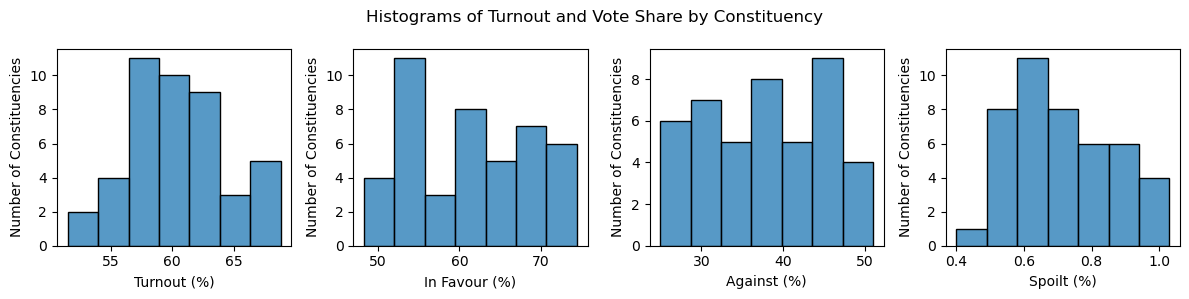

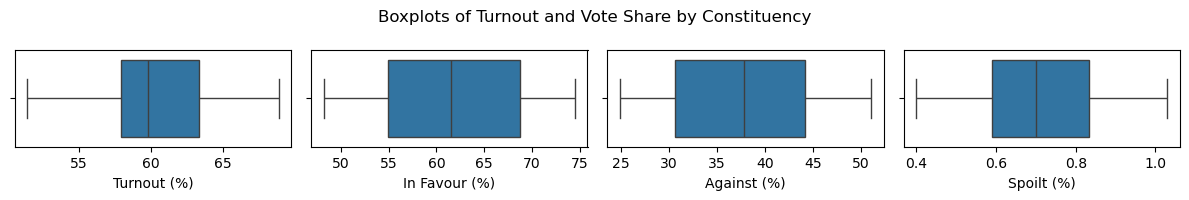

In [193]:
percentage_cols = ['Turnout (%)', 'In Favour (%)', 'Against (%)', 'Spoilt (%)']

plt.figure(figsize=(12,3))

for idx, col in enumerate(percentage_cols, 1):
    plt.subplot(1, 4, idx)
    sns.histplot(x=col, data=results)
    plt.ylabel("Number of Constituencies")

plt.suptitle("Histograms of Turnout and Vote Share by Constituency")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,2))

for idx, col in enumerate(percentage_cols, 1):
    plt.subplot(1, 4, idx)
    sns.boxplot(x=col, data=results)

plt.suptitle("Boxplots of Turnout and Vote Share by Constituency")
plt.tight_layout()
plt.show()

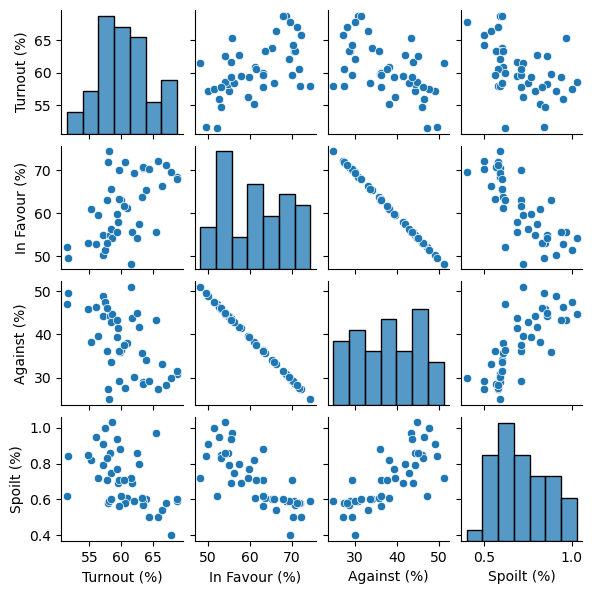

In [195]:
sns.pairplot(results[percentage_cols], height=1.5)
plt.show()

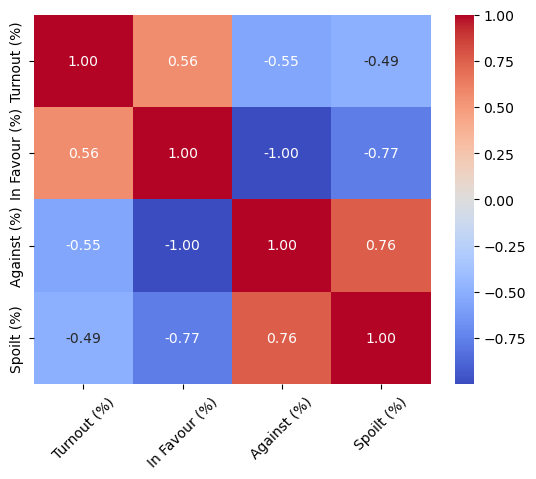

In [197]:
sns.heatmap(results[percentage_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.xticks(rotation=45)
plt.show()

From the pair plots and heatmap, we observe that there was a moderate positive correlation between turnout and votes in favour, and a moderate negative correlation between turnout and votes against and votes spoilt. There was a strong positive correlation between votes against and votes spoilt, possibly indicating "protest" ballots. 

## Results by Constituency

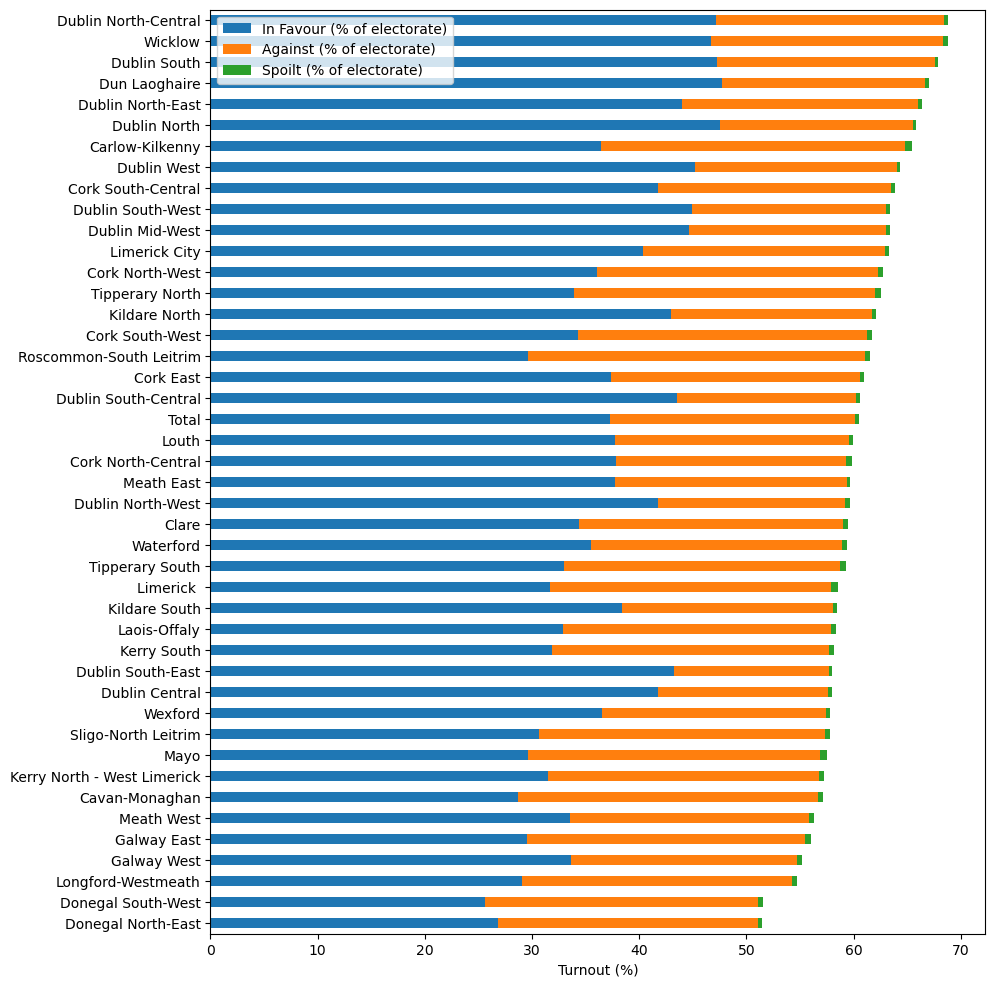

In [201]:
sorted_by_turnout = results.sort_values(by='Turnout (%)', ascending=True)

sorted_by_turnout.set_index('Constituency')[['In Favour (% of electorate)', 'Against (% of electorate)', 'Spoilt (% of electorate)']].plot(kind='barh', stacked=True, figsize=(10, 12))
plt.ylabel("")
plt.xlabel("Turnout (%)")

plt.show()

## Geographical Data (Shapefile)

To visualise the election results on a map, we require the geometry information obtained in the `ireland_map` shapefile.

In [203]:
ireland_map.head()

,CON_2007,CON_NAME,NO_MEMBERS,geometry
0,43,Wicklow,5,"MULTIPOLYGON (((302419.960 220863.324, 302424...."
1,17,Dublin South,5,"POLYGON ((318854.135 230304.527, 319037.399 23..."
2,12,Dublin Mid-West,4,"POLYGON ((309536.329 234960.561, 309536.769 23..."
3,18,Dublin South-Central,5,"POLYGON ((315125.724 234149.501, 315128.652 23..."
4,05,Cork North-Central,4,"MULTIPOLYGON (((164989.734 71450.468, 164979.1..."


The datasets were merged using the `Constituency` and `CON_NAME` columns. Any whitespace present in the entries was stripped, then any missing or mismatched constituencies were identified by comparing two sets.

In [205]:
print(results['Constituency'].unique())

['Carlow-Kilkenny' 'Cavan-Monaghan' 'Clare' 'Cork East'
 'Cork North-Central' 'Cork North-West' 'Cork South-Central'
 'Cork South-West' 'Donegal North-East' 'Donegal South-West'
 'Dublin Central' 'Dublin Mid-West' 'Dublin North' 'Dublin North-Central'
 'Dublin North-East' 'Dublin North-West' 'Dublin South'
 'Dublin South-Central' 'Dublin South-East' 'Dublin South-West'
 'Dublin West' 'Dun Laoghaire' 'Galway East' 'Galway West'
 'Kerry North - West Limerick' 'Kerry South' 'Kildare North'
 'Kildare South' 'Laois-Offaly' 'Limerick ' 'Limerick City'
 'Longford-Westmeath' 'Louth' 'Mayo' 'Meath East' 'Meath West'
 'Roscommon-South Leitrim' 'Sligo-North Leitrim' 'Tipperary North'
 'Tipperary South' 'Waterford' 'Wexford' 'Wicklow' 'Total']


In [207]:
print(ireland_map['CON_NAME'].unique())

['Wicklow' 'Dublin South' 'Dublin Mid-West' 'Dublin South-Central'
 'Cork North-Central' 'Clare' 'Cork East' 'Donegal North-East'
 'Donegal South-West' 'Dublin North' 'Dublin North-East' 'Dún Laoghaire'
 'Galway East' 'Kerry North-West Limerick' 'Kildare North' 'Galway West'
 'Meath East' 'Sligo-North Leitrim' 'Wexford' 'Cork South-West'
 'Cork South-Central' 'Limerick' 'Louth' 'Carlow-Kilkenny'
 'Tipperary North' 'Mayo' 'Waterford' 'Kerry South' 'Laois-Offaly'
 'Limerick City' 'Meath West' 'Kildare South' 'Dublin North-West'
 'Dublin Central' 'Tipperary South' 'Roscommon-South Leitrim'
 'Cavan-Monaghan' 'Dublin North-Central' 'Longford-Westmeath'
 'Cork North-West' 'Dublin South-West' 'Dublin South-East' 'Dublin West'
 None]


In [209]:
# Remove whitespace
results['Constituency'] = results['Constituency'].str.strip()
ireland_map['CON_NAME'] = ireland_map['CON_NAME'].str.strip()

In [211]:
# Identify missing or mismatched constituencies

missing_in_map = set(results['Constituency']).difference(ireland_map['CON_NAME'])
print("Missing in Map:", missing_in_map)

missing_in_results = set(ireland_map['CON_NAME']).difference(results['Constituency'])
print("Missing in Results:", missing_in_results)

Missing in Map: {'Kerry North - West Limerick', 'Dun Laoghaire', 'Total'}
Missing in Results: {None, 'Dún Laoghaire', 'Kerry North-West Limerick'}


Two problematic constituency names were identified and resolved: one with interior whitespace and one with a missing fada (u vs. ú). The 'Total' column was not required and was omitted from the merged dataset.

In [213]:
# Create a mapping dictionary for mismatches
rename_map = {
    "Kerry North - West Limerick": "Kerry North-West Limerick",
    "Dun Laoghaire": "Dún Laoghaire"
}

# Apply renaming
results['Constituency'] = results['Constituency'].replace(rename_map)

In [215]:
missing_in_map = set(results['Constituency']).difference(ireland_map['CON_NAME'])
print("Still Missing in Map:", missing_in_map)

Still Missing in Map: {'Total'}


In [217]:
ireland_map.rename(columns={'CON_NAME': 'Constituency'}, inplace=True)

In [219]:
merged_data = ireland_map.merge(results, on='Constituency', how='inner')

In [221]:
merged_data.head()

,CON_2007,Constituency,NO_MEMBERS,geometry,Electorate,Total Poll,Turnout (%),Votes in favour of proposal,Votes against proposal,Spoilt votes,In Favour (%),Against (%),Spoilt (%),In Favour (% of electorate),Against (% of electorate),Spoilt (% of electorate)
0,43,Wicklow,5,"MULTIPOLYGON (((302419.960 220863.324, 302424....",94275,64830,68.77,44059,20384,387,67.96,31.44,0.60,46.734553,21.621851,0.410501
1,17,Dublin South,5,"POLYGON ((318854.135 230304.527, 319037.399 23...",103969,70543,67.85,49109,21150,284,69.62,29.98,0.40,47.234272,20.342602,0.273158
2,12,Dublin Mid-West,4,"POLYGON ((309536.329 234960.561, 309536.769 23...",67091,42528,63.39,29984,12291,253,70.50,28.90,0.59,44.691538,18.319894,0.377100
3,18,Dublin South-Central,5,"POLYGON ((315125.724 234149.501, 315128.652 23...",80406,48690,60.56,34988,13418,284,71.86,27.56,0.58,43.514166,16.687809,0.353207
4,05,Cork North-Central,4,"MULTIPOLYGON (((164989.734 71450.468, 164979.1...",75263,45059,59.87,28479,16182,398,63.20,35.91,0.88,37.839310,21.500605,0.528812


## Plotting Static Maps

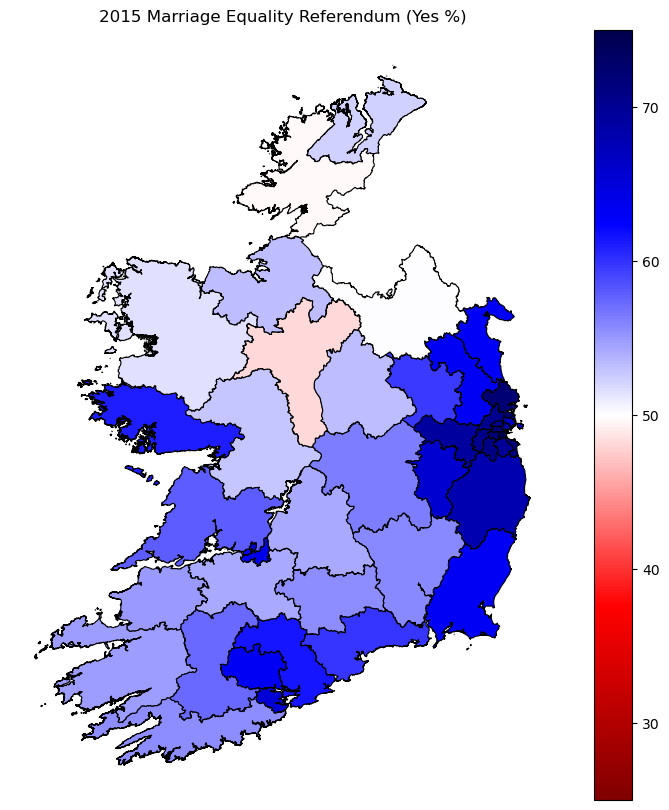

In [223]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

merged_data.plot(column='In Favour (%)',
                 cmap='seismic_r',
                 linewidth=0.8,
                 edgecolor='black',
                 legend=True,
                 ax=ax,
                 vmin=25,
                 vmax=75
                )

# Customize the map
ax.set_title("2015 Marriage Equality Referendum (Yes %)")
ax.axis("off")
plt.show()

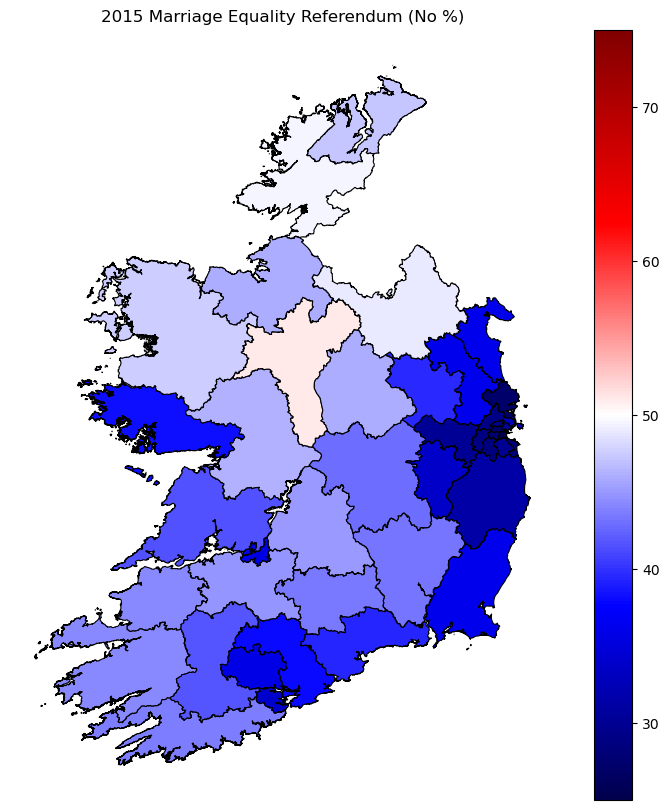

In [225]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

merged_data.plot(column='Against (%)',
                 cmap='seismic',
                 linewidth=0.8,
                 edgecolor='black',
                 legend=True,
                 ax=ax,
                 vmin=25,
                 vmax=75
                )

# Customize the map
ax.set_title("2015 Marriage Equality Referendum (No %)")
ax.axis("off")
plt.show()

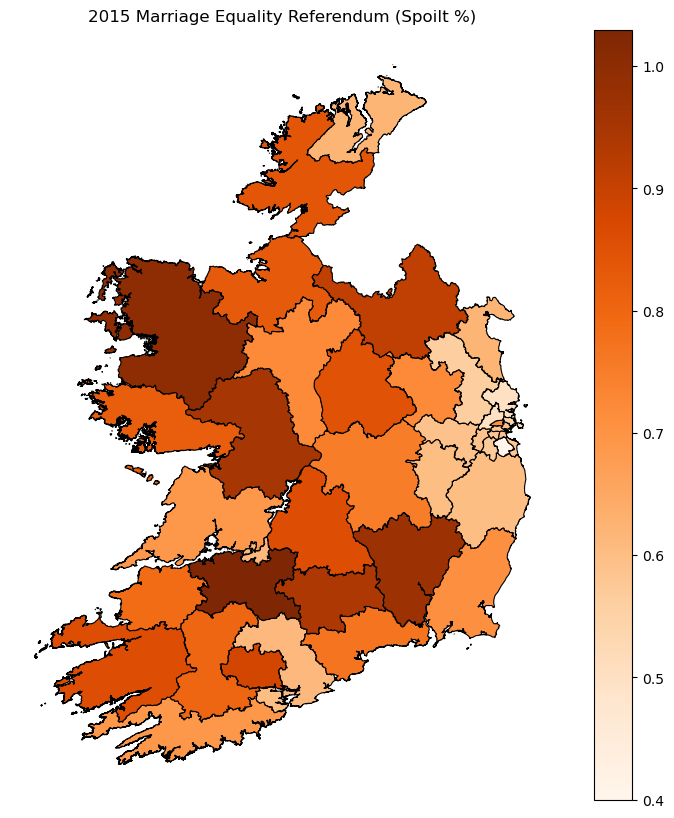

In [226]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

merged_data.plot(column='Spoilt (%)',
                 cmap='Oranges',
                 linewidth=0.8,
                 edgecolor='black',
                 legend=True,
                 ax=ax
                )

# Customize the map
ax.set_title("2015 Marriage Equality Referendum (Spoilt %)")
ax.axis("off")
plt.show()

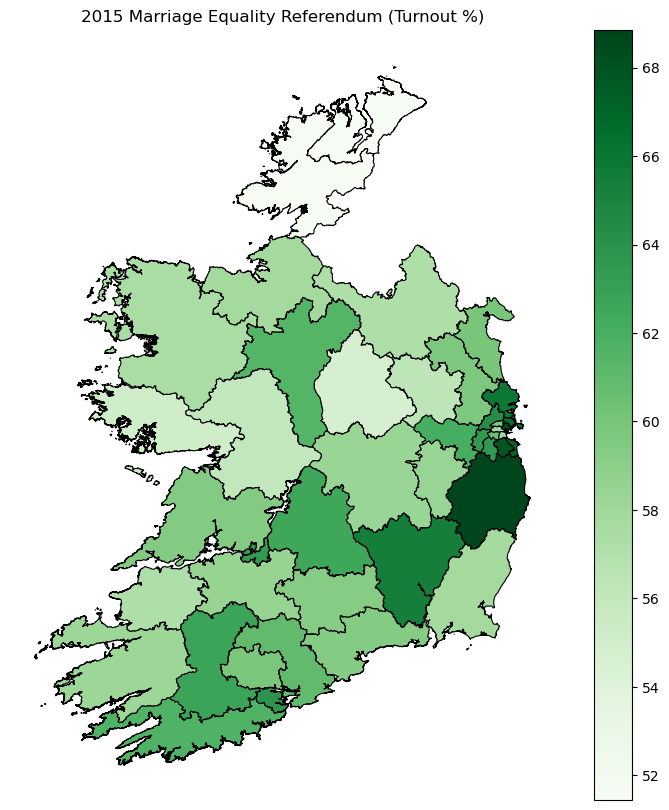

In [229]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

merged_data.plot(column='Turnout (%)',
                 cmap='Greens',
                 linewidth=0.8,
                 edgecolor='black',
                 legend=True,
                 ax=ax
                )

# Customize the map
ax.set_title("2015 Marriage Equality Referendum (Turnout %)")
ax.axis("off")
plt.show()